In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
####2.3.1. Загрузка данных и первичный осмотр
dataset = pd.read_csv('S02-hw-dataset.csv', sep=',')
print(dataset.head())
print(dataset.info())
print(dataset.describe())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [12]:
#### 2.3.2. Пропуски, дубликаты и базовый контроль качества
#1. Посчитать долю пропусков в каждом столбце (например, через `isna().mean()` или аналог).
print("Доля пропусков:")
k=0
for num in dataset.columns:
    k+=1
    print(k,"столбец", dataset.columns[k-1], ":", dataset[num].isna().mean())

#2. Проверить наличие полностью дублирующих строк (через `duplicated()`).
print("\nНаличие дублирующих строк:")
print(dataset.duplicated())

#3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры:
#   - отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
#   - нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
#   - другие логические противоречия, характерные для конкретного датасета.
#user_id   age country  purchases  revenue
print("--Проверка user_id--")
print(dataset[dataset['user_id']  <= 0])
print("\n--Проверка age--")
print(dataset[(dataset['age']  < 0) | (dataset['age']  > 100)])
print("\n--Проверка purchases--")
print(dataset[dataset['purchases']  < 0])
print("\n--Проверка revenues--")
print(dataset[(dataset['revenue']  < 0) | ((dataset['revenue']  == 0) & (dataset['purchases']  != 0))])



#В итоге:
#Есть пропуске в столбце age
#Есть дубликат в строке 41
#Есть перебор по возрасту в 6 строке
#Есть отрицательное значение в 6 строке
#Есть нулевой доход при ненулевых количествах в 11 строке

Доля пропусков:
1 столбец user_id : 0.0
2 столбец age : 0.04878048780487805
3 столбец country : 0.0
4 столбец purchases : 0.0
5 столбец revenue : 0.0

Наличие дублирующих строк:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool
--Проверка user_id--
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []

--Проверка age--
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

--Проверка purchases--
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1  

In [13]:
#### 2.3.3. Базовый EDA: группировки, агрегаты и частоты
#1. Посчитать частоты для одной или двух категориальных переменных (например, `value_counts()` для столбца с категорией/страной/классом).
print("Частота для country:")
print(dataset['country'].value_counts())

#2. Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`:
#   - например, среднее и сумму по количественным признакам в разрезе категорий.
print("\n\nГруппировка для country:")
print(dataset.groupby('country').agg({'purchases':'median'}))

#3. При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).
print("\nДоп. коридоры:")
revenue_bins = [0, 100, 200, 400, 600, 800, 1000, 1500, 100000]
revenue_labels = ['0-100', '101-200', '201-400', '401-600', '601-800', '801-1000', '1001-1500', '1500+']
dataset['revenue_amount'] = pd.cut(dataset['revenue'], bins = revenue_bins, labels = revenue_labels, include_lowest=True)
print(dataset.groupby('revenue_amount', observed=True).agg({'purchases' : 'mean'}))
print("\nКол-во пользователей по revenue:")
revenue_counts = dataset.groupby('revenue_amount', observed=True)['revenue'].count()
print(revenue_counts)

#4. Кратко (1-2 абзаца) описать текстом основные наблюдения:
#   - какие категории доминируют,
#   - как отличаются группы по средним значениям,
#   - есть ли неожиданные эффекты.
#
# Больше человек всего из RU(13) и FR(12), меньше всего из CN(2)
#
# Больше заказов всего из DE, FR, RU(6.0)
#
# Наибольшее кол-во заказов приходится на заказы с прибылью от 1000+
#
# Больше всего человек в группах с доходностью "401-600", "601-800" и "1001-1500" (8).

Частота для country:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


Группировка для country:
         purchases
country           
CN             4.5
DE             6.0
FR             6.0
RU             6.0
US             4.0

Доп. коридоры:
                purchases
revenue_amount           
0-100            1.000000
101-200          2.000000
201-400          5.000000
401-600          4.250000
601-800          5.250000
801-1000         3.666667
1001-1500        6.000000
1500+            8.000000

Кол-во пользователей по revenue:
revenue_amount
0-100        4
101-200      2
201-400      3
401-600      8
601-800      8
801-1000     3
1001-1500    8
1500+        5
Name: revenue, dtype: int64


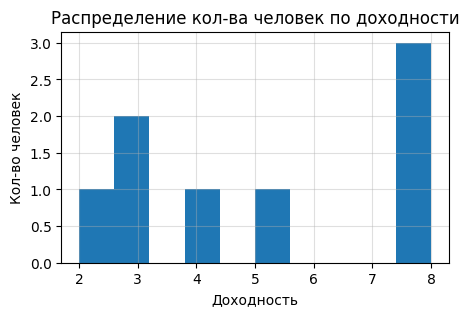

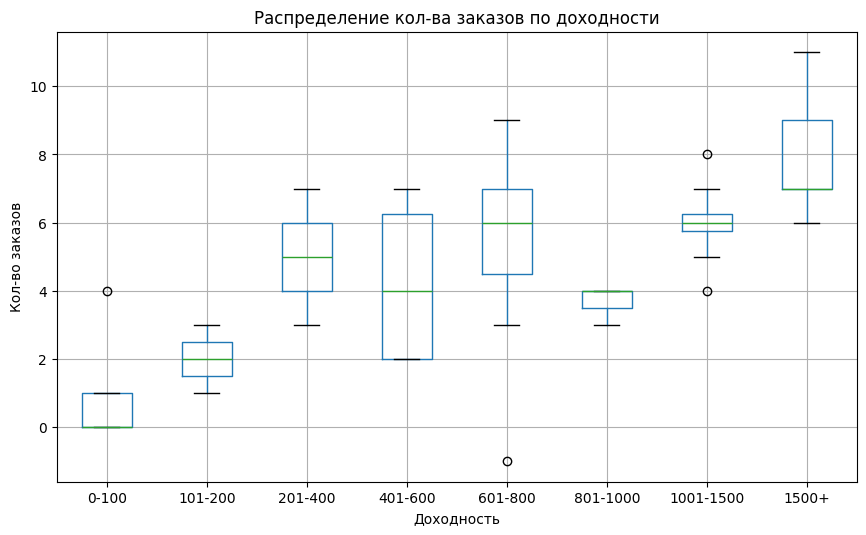

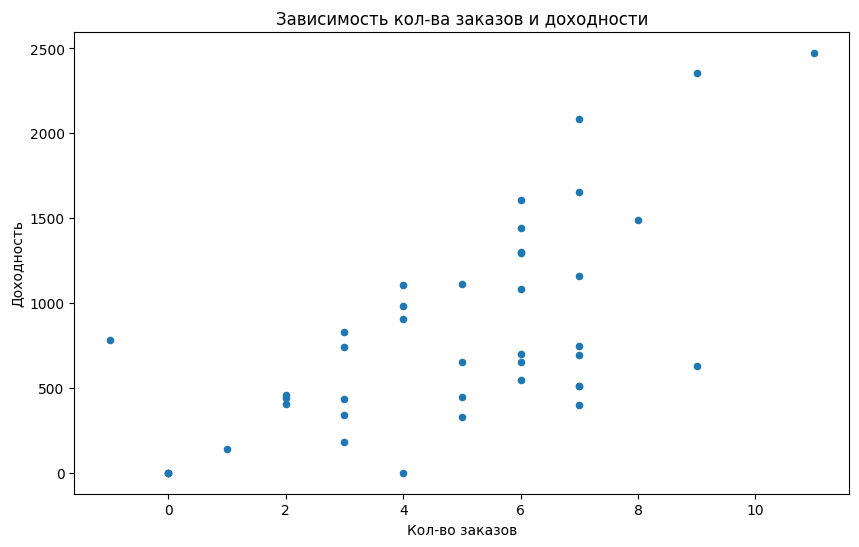

In [16]:
### 2.4. Визуализация данных в Matplotlib
#1. **Одну гистограмму** для количественного признака:
#   - осмысленный выбор числа корзин (`bins`),
#   - подписи осей и заголовок.
fig_hist, ax_hist = plt.subplots(figsize=(5, 3))
revenue_counts.plot(kind='hist', ax=ax_hist)
ax_hist.set_title("Распределение кол-ва человек по доходности")
ax_hist.set_xlabel("Доходность")
ax_hist.set_ylabel("Кол-во человек")
ax_hist.grid(True, alpha=0.4)
plt.savefig(f'{'./figures'}/histogram.png', dpi=250, bbox_inches='tight')
plt.show()

#2. **Один боксплот (boxplot)** для количественного признака:
#- можно как общий, так и по группам (например, по категориям),
#- подписи оси и заголовок.

fig_box, ax_box = plt.subplots(figsize=(10, 6))
dataset.boxplot(column='purchases', by='revenue_amount', ax=ax_box)
plt.suptitle('')
ax_box.set_title("Распределение кол-ва заказов по доходности")
ax_box.set_ylabel("Кол-во заказов")
ax_box.set_xlabel("Доходность")
plt.savefig(f'{'./figures'}/boxplot.png', dpi=250, bbox_inches='tight')
plt.show()

#3. **Один scatter plot** (диаграмма рассеяния) для пары количественных признаков:
#   - подписи обеих осей,
#   - заголовок,
#   - при желании можно добавить цвет/легенду для различения категорий.

fig_plot, ax_plot = plt.subplots(figsize=(10, 6))
dataset.plot.scatter(x='purchases', y='revenue', ax=ax_plot)
ax_plot.set_xlabel("Кол-во заказов")
ax_plot.set_ylabel("Доходность")
ax_plot.set_title("Зависимость кол-ва заказов и доходности")
plt.savefig(f'{'./figures'}/scatter_plot.png', dpi=250, bbox_inches='tight')
plt.show()